In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns", None)


games_df = pd.read_csv("video_games.csv")

print(games_df.describe())

print(games_df.columns)

print(games_df.head(10))

print(games_df.info())

#see the duplicates
dupl_rows = games_df.duplicated()
print(dupl_rows.value_counts())

#False    18799 True         1
dupl_rows = games_df.name.duplicated()
print(dupl_rows.value_counts())
# False 12254 # True 6546 -> based on the vide games name we have 6546 duplicated row but its not a problem because the games have published on different platforms

games_df = games_df.drop_duplicates().reset_index()
dupl_rows = games_df.duplicated()
print(dupl_rows.value_counts())

         name platform       release_date  \
count   18800    18800              18800   
unique  12254       22               4533   
top      Cars       PC  November 14, 2006   
freq        9     4864                 48   

                                                  summary user_review  
count                                               18686       18800  
unique                                              14647          94  
top     Iron Man, an explosive third-person action sho...         tbd  
freq                                                    7        1365  
Index(['name', 'platform', 'release_date', 'summary', 'user_review'], dtype='object')
                                   name        platform        release_date  \
0  The Legend of Zelda: Ocarina of Time     Nintendo 64   November 23, 1998   
1              Tony Hawk's Pro Skater 2     PlayStation  September 20, 2000   
2                   Grand Theft Auto IV   PlayStation 3      April 29, 2008   
3           

In [2]:
# see the top 5 video games by ratings

# change the tbd to 0
games_df["user_review"] = games_df.user_review.apply(lambda rate: 0 if rate == "tbd" else rate)


# turn user_review from object to float
games_df["user_review"] = games_df.user_review.astype("float")
print(games_df.user_review.dtypes)


#sorted the games by user_review
Top_rated_movie = games_df[["name", "user_review", "platform"]].sort_values(ascending = False, by = "user_review")

#look at the top 5 games
print(Top_rated_movie.head())


float64
                                              name  user_review  \
2450                Ghost Trick: Phantom Detective          9.7   
10936                                      Tengami          9.7   
4844                                  GrimGrimoire          9.7   
4953                                       Rochard          9.7   
3504   Z.H.P. Unlosing Ranger vs Darkdeath Evilman          9.7   

             platform  
2450               DS  
10936           Wii U  
4844    PlayStation 2  
4953    PlayStation 3  
3504              PSP  


Make some other questions what we want to insight:

1; Is there any Significance difference in the user_review by platform?
2; How many games we have by platforms? XX
3; What is the avarege user rating by platforms? XX
4; Changing User ratings in time to time (xbox vs playstation) XX
5; How change the published number of the games by year? XX
6; How change the user ratings by decade? XX
7; Make a category from user rating and sum the number of categoryies by platform XX




In [3]:
# set the colwidth to see the horizontaly length without truncated
pd.set_option("display.max_colwidth", None)
print(games_df.summary.head())

#separete the day and month from the year value
clean_date = games_df.release_date.str.split(',')

#make a new column for the year values
games_df["date"] = clean_date.str.get(1)

print(games_df.date.sort_values(ascending = True))

0                                                                                                                                                                                                                                                As a young boy, Link is tricked by Ganondorf, the King of the Gerudo Thieves. The evil human uses Link to gain access to the Sacred Realm, where he places his tainted hands on Triforce and transforms the beautiful Hyrulean landscape into a barren wasteland. Link is determined to fix the problems he helped to create, so with the help of Rauru he travels through time gathering the powers of the Seven Sages.
1                                                                                                                                                                                                                                                                                                                                                             

In [4]:
print(games_df.columns)
#print(games_df.head(10))

# Lets see the avarage User Ratings by Platforms:

rating_avg_pltf = games_df.groupby("platform").user_review.mean().reset_index()
rating_avg_pltf.info()

rating_avg_pltf.sort_values(ascending = False ,by = "user_review")

# We see the old platforms gets higher user ratings, the gamers nowadays would be more strict?

Index(['index', 'name', 'platform', 'release_date', 'summary', 'user_review',
       'date'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   platform     22 non-null     object 
 1   user_review  22 non-null     float64
dtypes: float64(1), object(1)
memory usage: 480.0+ bytes


,platform,user_review
5,Nintendo 64,7.954930
2,Dreamcast,7.492800
14,Stadia,7.380000
17,Wii U,7.192935
13,PlayStation Vita,7.098054
9,PlayStation 2,6.983805
8,PlayStation,6.855080
4,GameCube,6.850223
0,3DS,6.781061
10,PlayStation 3,6.660032


In [5]:
#take an insight into the highest and the lowest rated games by platforms
print("The highest rated games by platforms : \n")
top_games_by_pltf = games_df.groupby("platform").user_review.max().reset_index()
top_games_by_pltf = pd.merge(top_games_by_pltf, games_df, on = ["platform", "user_review"], how = "left").reset_index(drop = True)
print(top_games_by_pltf[["platform", "name", "user_review"]])

 # There are some equal rated games in the most platforms


The highest rated games by platforms : 

             platform                                         name  \
0                 3DS      The Legend of Zelda: Ocarina of Time 3D   
1                 3DS                       Fire Emblem: Awakening   
2                 3DS   The Legend of Zelda: A Link Between Worlds   
3                  DS               Ghost Trick: Phantom Detective   
4                  DS                                Metal Torrent   
5           Dreamcast                              Resident Evil 2   
6    Game Boy Advance                               Metroid Fusion   
7            GameCube                              Resident Evil 4   
8            GameCube                         Resident Evil (2002)   
9         Nintendo 64         The Legend of Zelda: Ocarina of Time   
10        Nintendo 64           The Legend of Zelda: Majora's Mask   
11        Nintendo 64                               Super Mario 64   
12        Nintendo 64                            

In [6]:
print("The Lowest rated games by platforms : \n")
tolerance = 0.1
lowest_games_by_pltf = games_df[games_df.user_review > tolerance]
lowest_games_by_pltf =lowest_games_by_pltf.groupby("platform").user_review.min().reset_index()
lowest_games_by_pltf = pd.merge(lowest_games_by_pltf, games_df, on = ["platform", "user_review"], how = "left").reset_index(drop = True)
print(lowest_games_by_pltf[["platform", "name", "user_review"]])

The Lowest rated games by platforms : 

             platform                                         name  \
0                 3DS                 Family Party: 30 Great Games   
1                  DS                                     WWE 2K20   
2           Dreamcast                Star Trek: Shattered Universe   
3    Game Boy Advance                   RollerCoaster Tycoon World   
4            GameCube                     Bad Boys: Miami Takedown   
5         Nintendo 64                    Arcania: Fall of Setarrif   
6                  PC                       Warcraft III: Reforged   
7                 PSP                   Thrillville: Off the Rails   
8                 PSP                       Dragon Ball: Evolution   
9         PlayStation                Mortal Kombat: Special Forces   
10      PlayStation 2                            Tennis World Tour   
11      PlayStation 3                                     Inkheart   
12      PlayStation 3  The History Channel: Battle

In [7]:
# How many games we have by platforms?


games_df.groupby("platform").name.count().reset_index()

# Pc has the most appearance and Stadia has lowest

,platform,name
0,3DS,396
1,DS,720
2,Dreamcast,125
3,Game Boy Advance,438
4,GameCube,448
5,Nintendo 64,71
6,PC,4863
7,PSP,512
8,PlayStation,187
9,PlayStation 2,1414


In [8]:
games_df.describe()
games_df.info()
# WE Make a new categorical column for a new subjective 3 components rating
games_df["game_quality"] = games_df.user_review.apply(lambda x: "good" if x >= 8.0 else ("medium" if 5.0 <= x < 8.0 else "bad"))
games_df[["user_review", "game_quality"]]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18799 entries, 0 to 18798
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         18799 non-null  int64  
 1   name          18799 non-null  object 
 2   platform      18799 non-null  object 
 3   release_date  18799 non-null  object 
 4   summary       18685 non-null  object 
 5   user_review   18799 non-null  float64
 6   date          18799 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.0+ MB


,user_review,game_quality
0,9.1,good
1,7.4,medium
2,7.7,medium
3,8.4,good
4,7.9,medium
5,9.1,good
6,9.1,good
7,8.0,good
8,7.9,medium
9,8.3,good


In [9]:
#print(games_df.head())
# Sum the number of game quality (good, medium, bad) by platform
games_df.groupby("platform").game_quality.value_counts()


platform           game_quality
 3DS               medium           264
                   good              88
                   bad               44
 DS                medium           394
                   good             165
                   bad              161
 Dreamcast         good              70
                   medium            47
                   bad                8
 Game Boy Advance  good             162
                   medium           162
                   bad              114
 GameCube          medium           202
                   good             185
                   bad               61
 Nintendo 64       good              46
                   medium            23
                   bad                2
 PC                medium          3391
                   good             859
                   bad              613
 PSP               medium           286
                   good             153
                   bad               73
 PlaySta

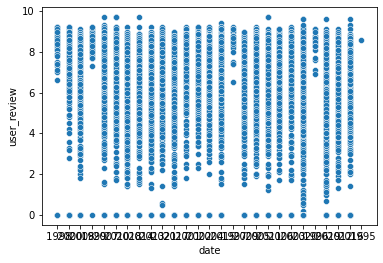

     date  user_review
0    1995     8.600000
1    1996     8.350000
2    1997     8.460714
3    1998     8.033333
4    1999     8.313208
5    2000     6.623729
6    2001     6.756747
7    2002     6.319334
8    2003     6.858801
9    2004     6.925520
10   2005     6.841939
11   2006     6.594808
12   2007     6.479393
13   2008     6.399893
14   2009     6.325830
15   2010     6.721411
16   2011     6.513869
17   2012     6.733460
18   2013     6.763026
19   2014     6.776425
20   2015     6.672410
21   2016     6.455657
22   2017     6.367521
23   2018     6.392059
24   2019     6.294659
25   2020     5.853789
26   2021     5.116532
     date  name
0    1995     1
1    1996    20
2    1997    28
3    1998    45
4    1999    53
5    2000   354
6    2001   541
7    2002   781
8    2003   801
9    2004   721
10   2005   856
11   2006   886
12   2007   922
13   2008   932
14   2009   964
15   2010   836
16   2011   858
17   2012   792
18   2013   760
19   2014   772
20   2015   859
21  

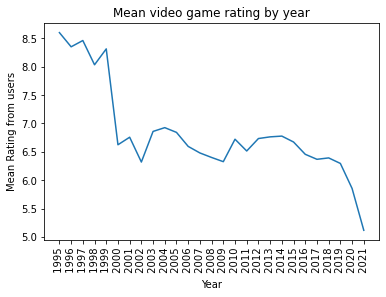

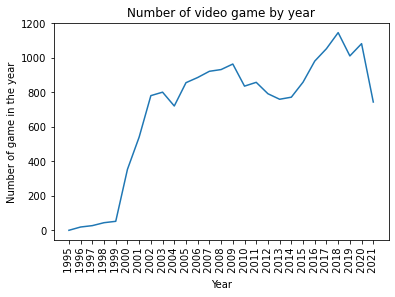

In [10]:
#How change the user ratings by decade?
import matplotlib.pyplot as plt
import seaborn as sns

# This is completely unusable
sns.scatterplot(x= games_df.date, y = games_df.user_review, data = games_df)
plt.show()
#mean game rate in every year
mean_rate_by_year = games_df.groupby("date").user_review.mean().reset_index()
print(mean_rate_by_year)
# number of games in every year
num_game_by_year = games_df.groupby("date").name.count().reset_index()
print(num_game_by_year)

plt.clf()

plt.plot(mean_rate_by_year.date, mean_rate_by_year.user_review)
plt.xlabel("Year")
plt.ylabel("Mean Rating from users")
plt.title("Mean video game rating by year")
plt.xticks(rotation = 90)
plt.show()
plt.clf()
plt.plot(num_game_by_year.date, num_game_by_year.name)
plt.xlabel("Year")
plt.ylabel("Number of game in the year")
plt.title("Number of video game by year")
plt.xticks(rotation = 90)
plt.show()

# We see the mean user rating constantly decreasing but its not a suprise while the video games industry grew enormously under
#the last two decade. The more player more user review resulted the evaluation is better distributed.


# Another interesting, the released number of video games increasing process stopped in 2008 and start decreasing until 2013 (932->760)
# The global economy crisis? 
# What happened in 2020? Covid

In [11]:
# We have 22 different platform
print(games_df.platform.nunique())
# How many appereances are there on the platforms?
print(games_df.platform.value_counts())


22
 PC                  4863
 PlayStation 4       2056
 Xbox 360            1644
 PlayStation 2       1414
 Switch              1399
 PlayStation 3       1256
 Xbox One            1179
 Xbox                 789
 DS                   720
 Wii                  655
 PSP                  512
 GameCube             448
 Game Boy Advance     438
 3DS                  396
 PlayStation Vita     257
 PlayStation          187
 Wii U                184
 Dreamcast            125
 PlayStation 5        124
 Xbox Series X         77
 Nintendo 64           71
 Stadia                 5
Name: platform, dtype: int64


     date  user_review
0    2000     2.990909
1    2001     5.848980
2    2002     5.948571
3    2003     6.264641
4    2004     6.383851
5    2005     6.635714
6    2006     6.196791
7    2007     6.678090
8    2008     6.725258
9    2009     6.183333
10   2010     6.890870
11   2011     6.533755
12   2012     6.721078
13   2013     6.446835
14   2014     6.474286
15   2015     6.471698
16   2016     5.966825
17   2017     5.473298
18   2018     6.041414
19   2019     5.755556
20   2020     5.718935
21   2021     5.153608
     date  user_review
0    1996     8.416667
1    1997     8.587500
2    1998     8.170588
3    1999     8.512000
4    2000     5.805357
5    2001     6.725000
6    2002     6.915385
7    2003     7.499052
8    2004     7.263063
9    2005     7.299519
10   2006     7.016667
11   2007     6.614865
12   2008     6.301299
13   2009     6.563500
14   2010     6.688889
15   2011     6.633750
16   2012     6.644355
17   2013     6.863592
18   2014     6.759231
19   2015  

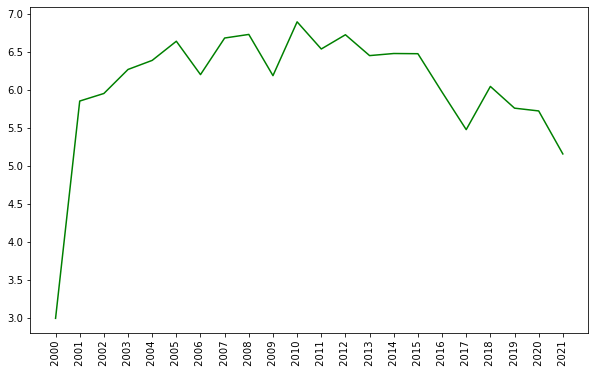

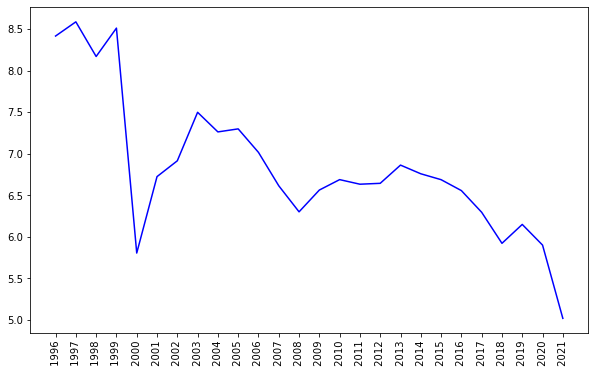

In [19]:
xbox = games_df[games_df.platform.str.contains("Xbox",case = False)].reset_index(drop = True)
ps = games_df[games_df.platform.str.contains("PlayStation",case = False)].reset_index(drop= True)
#print(ps.count())
#print(xbox.count())
xbox_rev_by_year = xbox.groupby("date").user_review.mean().reset_index()
ps_rev_by_year = ps.groupby("date").user_review.mean().reset_index()
print(xbox_rev_by_year)
print(ps_rev_by_year)


plt.figure(figsize = (10,6))
plt.plot(xbox_rev_by_year.date, xbox_rev_by_year.user_review, color = "green")
plt.xticks(rotation = 90)


plt.figure(figsize = (10,6))
plt.plot(ps_rev_by_year.date, ps_rev_by_year.user_review, color = "blue")
plt.xticks(rotation = 90)
plt.show()


In [20]:
#Is there any Significance difference between the user_review by platform?
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

tstat,pval = ttest_ind(xbox.user_review, ps.user_review)
print(xbox.user_review.head(10))
print(ps.user_review.head(10))
print(pval)

# 0.00000000010588574904045668 This is a big difference at the 0.05 significance level

0    7.9
1    8.0
2    7.9
3    8.3
4    8.7
5    9.0
6    9.0
7    8.9
8    8.6
9    8.1
Name: user_review, dtype: float64
0    7.4
1    7.7
2    8.3
3    7.5
4    8.5
5    8.4
6    8.4
7    8.8
8    8.8
9    9.1
Name: user_review, dtype: float64
1.0588574904045668e-10


In [23]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# see all possible significance differences between user_reviews by platforms but the number of platform count is in another distribution so not sure  it will tell us much in every case
tukey_result = pairwise_tukeyhsd(games_df.user_review, games_df.platform, 0.05)
print(tukey_result)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
              3DS                DS  -0.8519  0.001 -1.3481 -0.3557   True
              3DS         Dreamcast   0.7117 0.1864  -0.102  1.5255  False
              3DS  Game Boy Advance  -0.8313  0.001 -1.3813 -0.2813   True
              3DS          GameCube   0.0692    0.9 -0.4779  0.6162  False
              3DS       Nintendo 64   1.1739  0.007  0.1517  2.1961   True
              3DS                PC  -0.1517    0.9 -0.5661  0.2628  False
              3DS               PSP  -0.1945    0.9 -0.7253  0.3362  False
              3DS       PlayStation    0.074    0.9 -0.6297  0.7778  False
              3DS     PlayStation 2   0.2027    0.9 -0.2482  0.6537  False
              3DS     PlayStation 3   -0.121    0.9 -0.5781  0.3361  False
              3DS     Pla